In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the dataset 
data = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/16/forestfires.csv')

# Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Handling Missing Values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64


In [6]:
#duplicated rows
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
#Analyzing Numerical Variables and Distribution
numerical_variables = data.select_dtypes(include=['float64'])  


In [8]:
# Summary statistics
numerical_summary = numerical_variables.describe()
print("\nSummary Statistics of Numerical Variables:")
print(numerical_summary)


Summary Statistics of Numerical Variables:
             FFMC         DMC          DC         ISI        temp        wind  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168    4.017602   
std      5.520111   64.046482  248.066192    4.559477    5.806625    1.791653   
min     18.700000    1.100000    7.900000    0.000000    2.200000    0.400000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000    2.700000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000    4.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000    4.900000   
max     96.200000  291.300000  860.600000   56.100000   33.300000    9.400000   

             rain         area  
count  517.000000   517.000000  
mean     0.021663    12.847292  
std      0.295959    63.655818  
min      0.000000     0.000000  
25%      0.000000     0.000000  
50%      0.000000     0.5200

# Data Visualisation

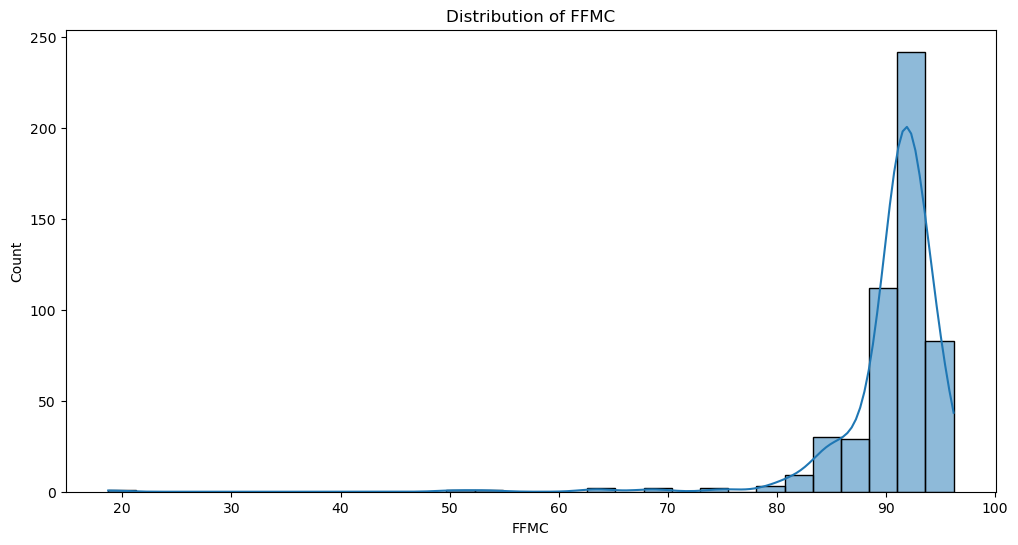

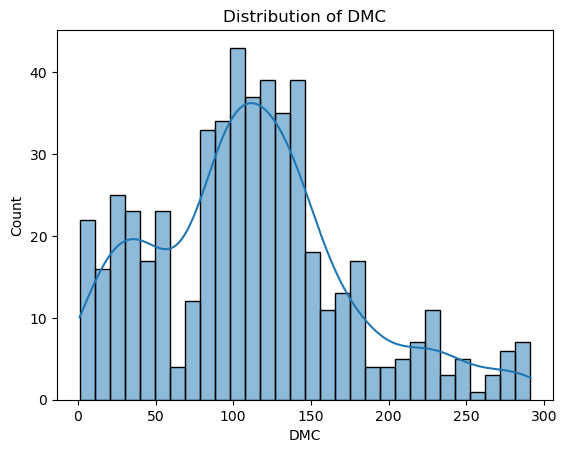

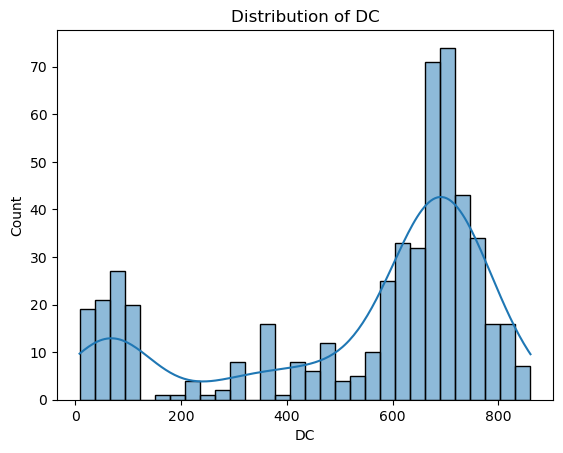

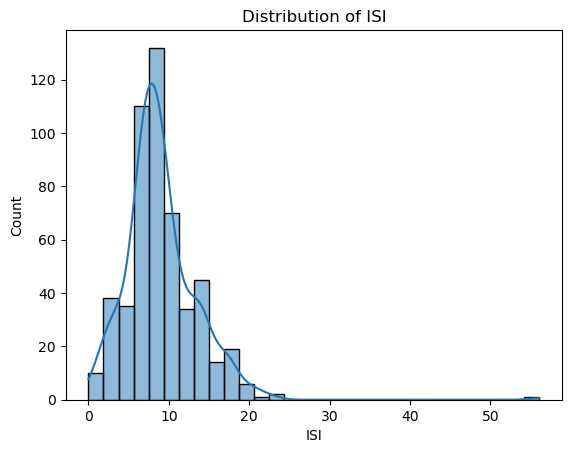

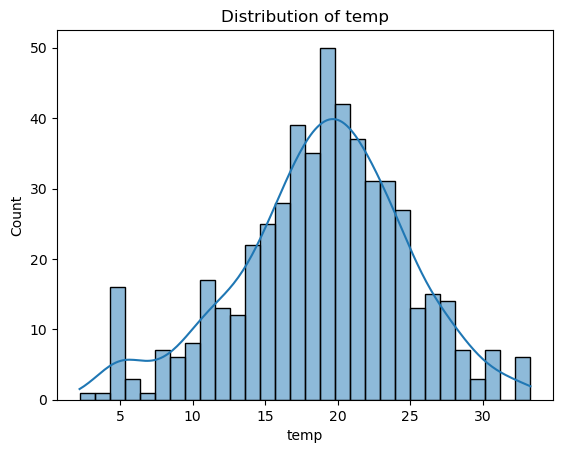

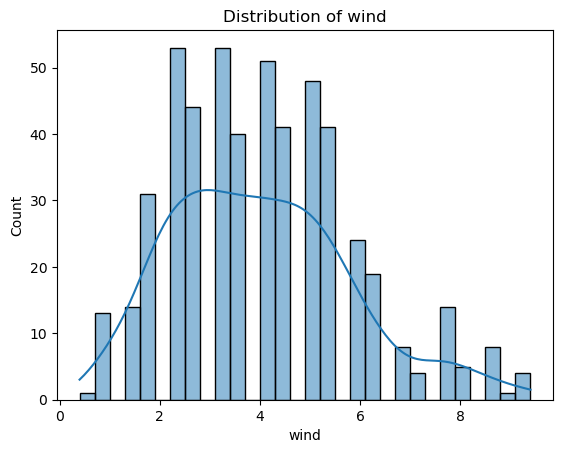

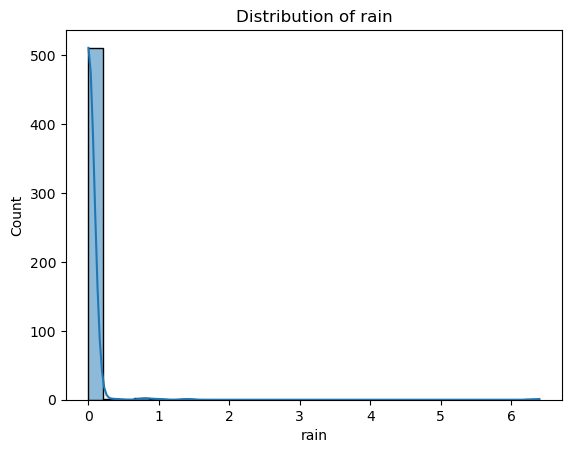

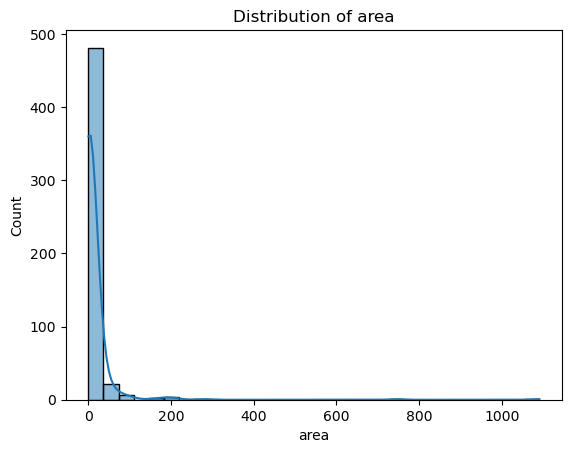

In [9]:
# Distribution of Numerical Variables
plt.figure(figsize=(12, 6))
for col in numerical_variables.columns:
    sns.histplot(numerical_variables[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


In [10]:
#Identifying Categorical Variables and Cardinality
categorical_variables = data.select_dtypes(include=['object']) 

In [11]:
# Cardinality of Categorical Variables
categorical_cardinality = categorical_variables.nunique()
print("\nCardinality of Categorical Variables:")
print(categorical_cardinality)


Cardinality of Categorical Variables:
month            12
day               7
size_category     2
dtype: int64


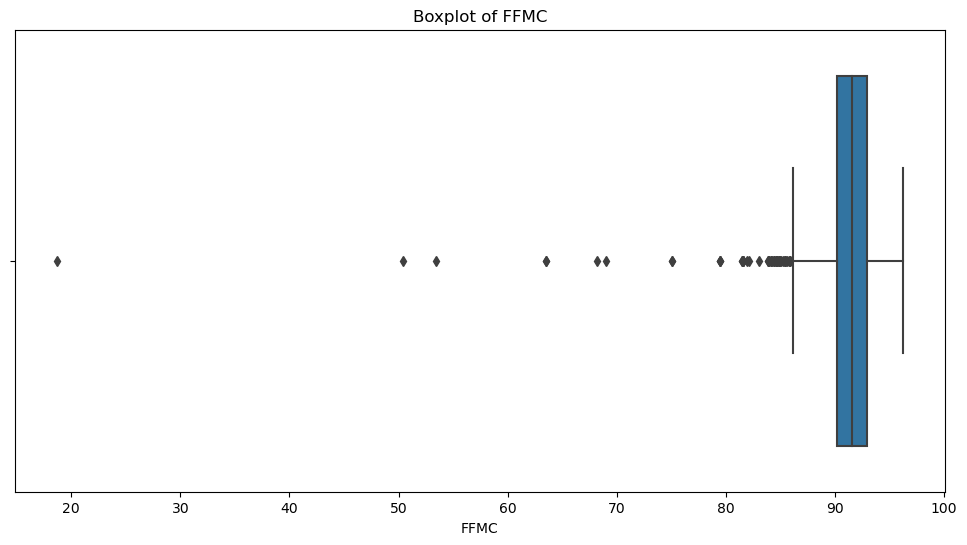

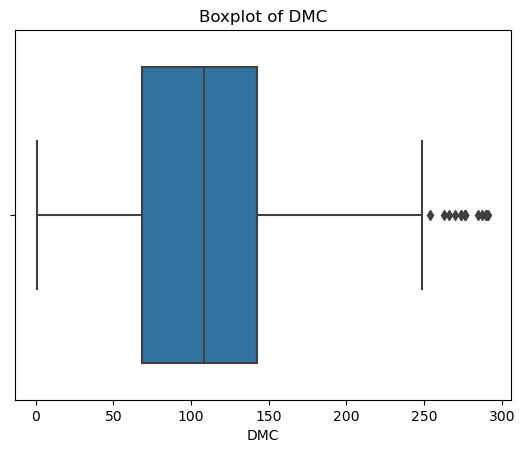

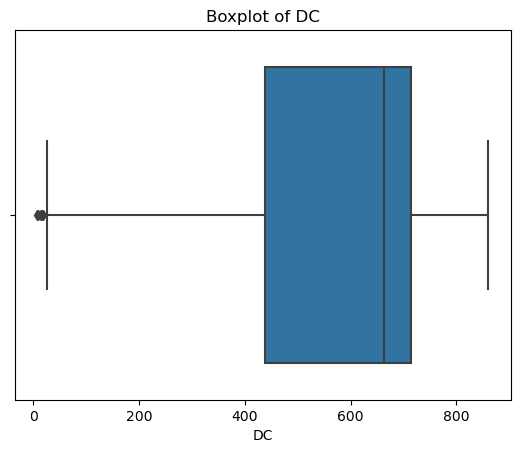

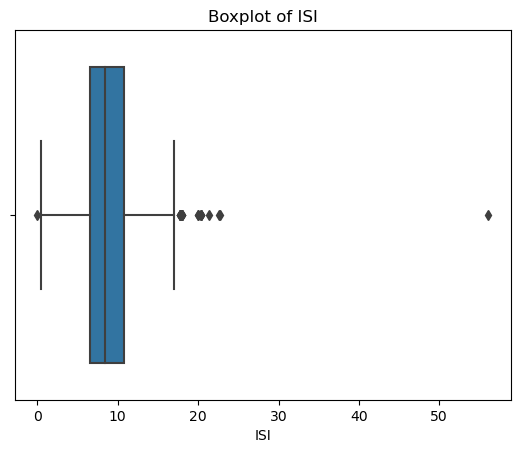

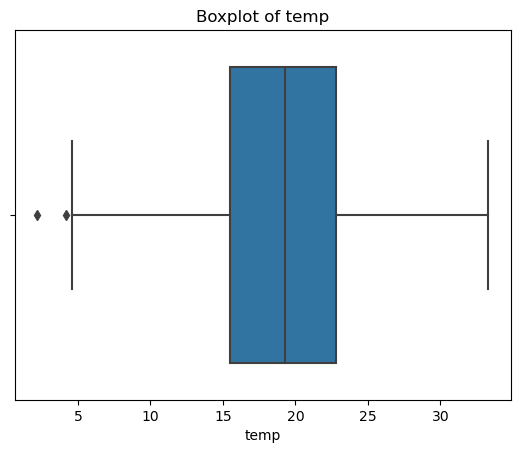

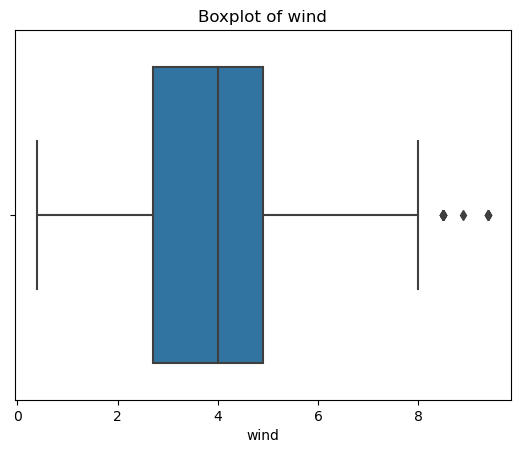

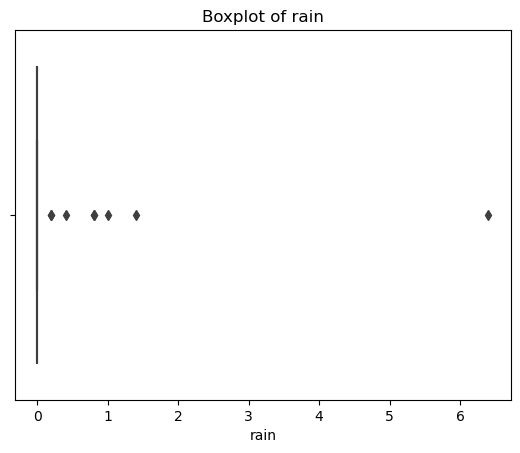

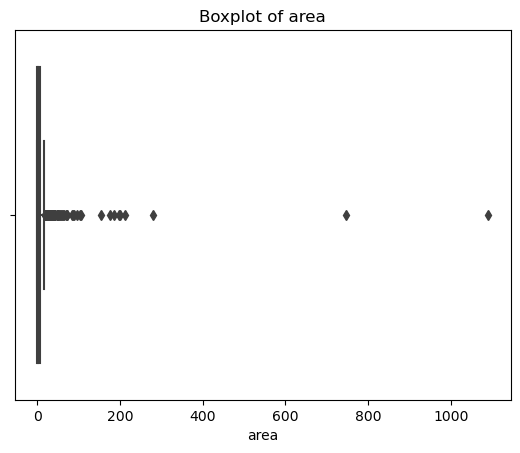

In [12]:
#Checking for Outliers
plt.figure(figsize=(12, 6))
for col in numerical_variables.columns:
    sns.boxplot(x=numerical_variables[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

##### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

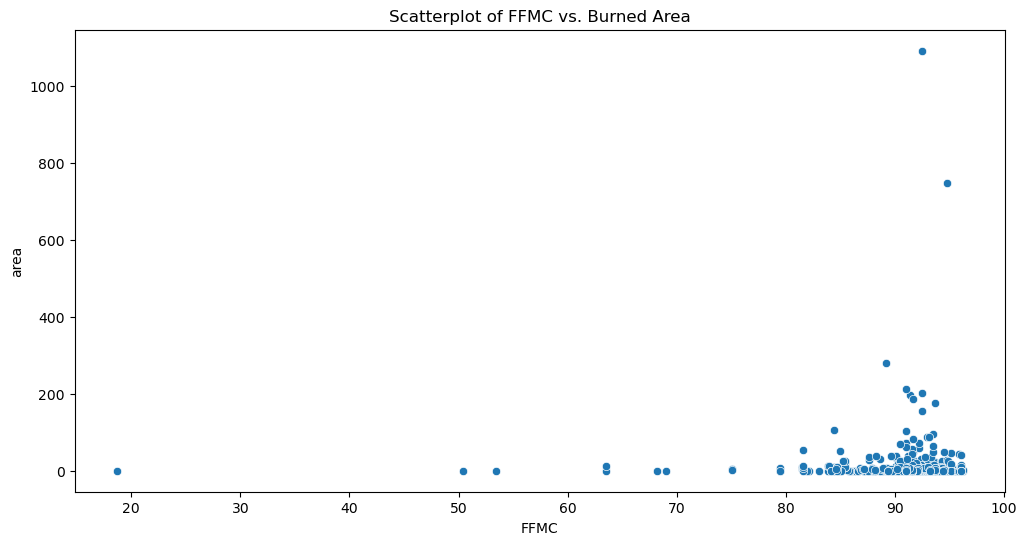

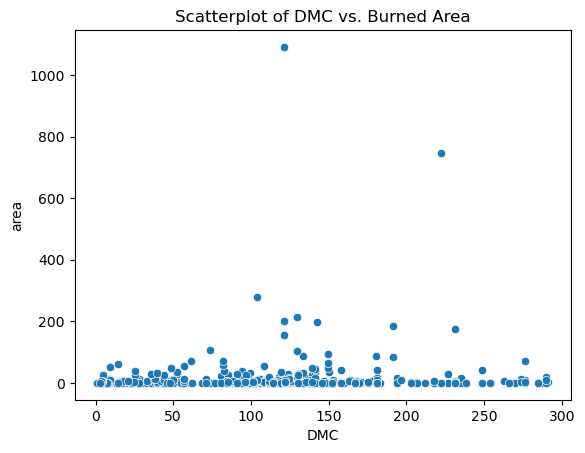

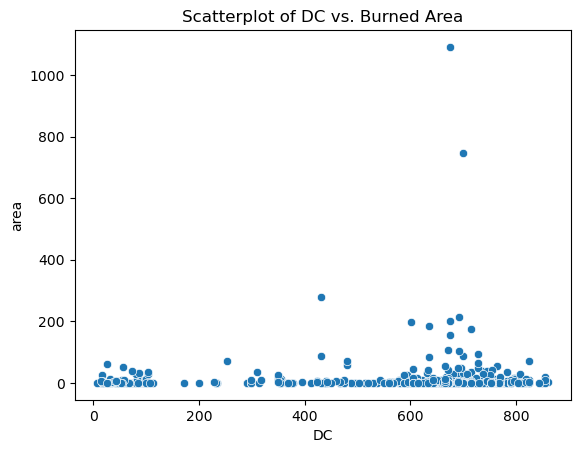

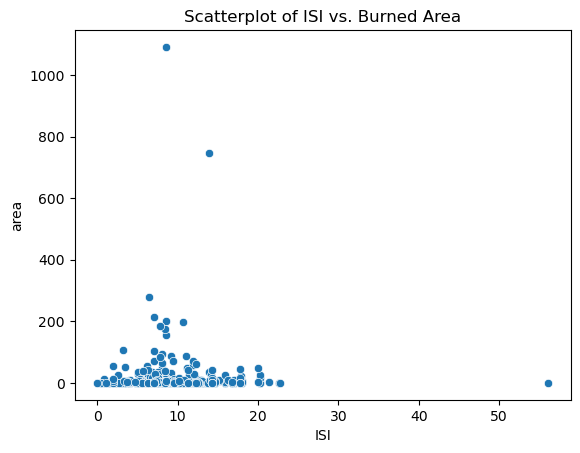

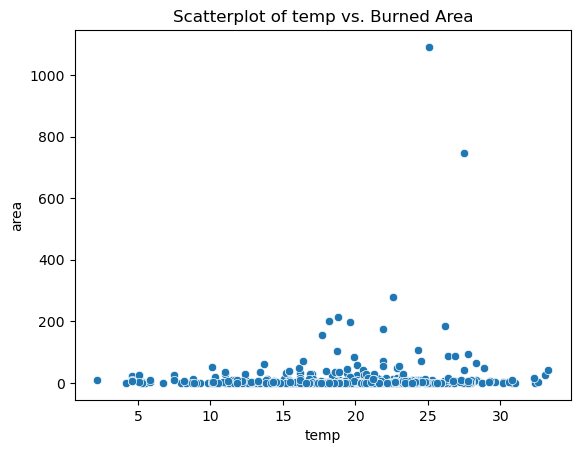

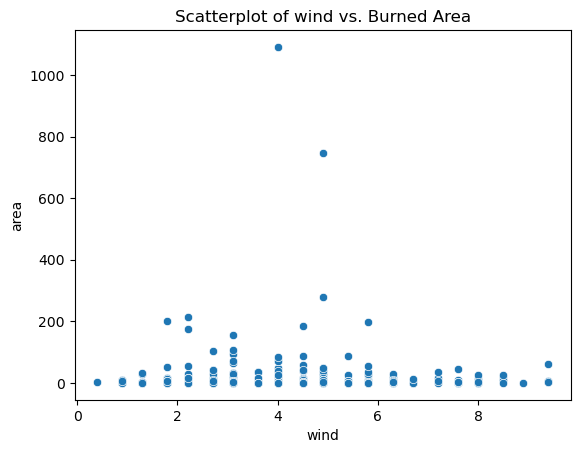

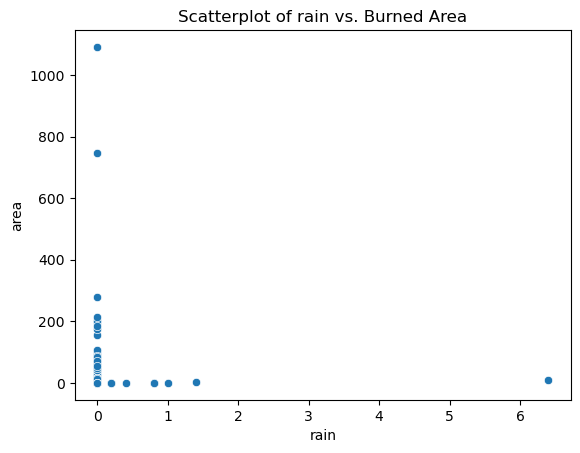

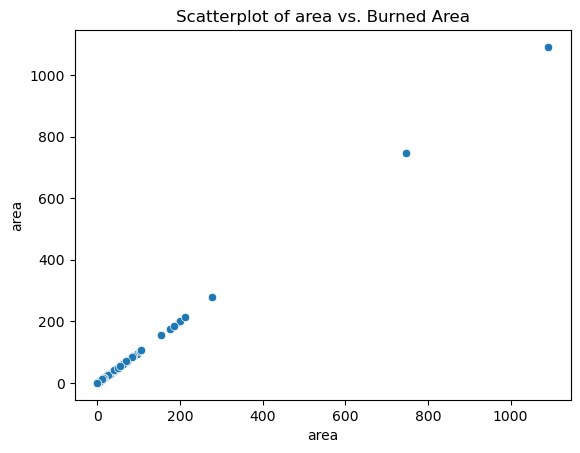

In [13]:
#Relationship between Independent Features and the Target (Burned Area)
# Assuming "area" is the target variable
plt.figure(figsize=(12, 6))
for col in numerical_variables.columns:
    sns.scatterplot(x=numerical_variables[col], y=data['area'])
    plt.title(f'Scatterplot of {col} vs. Burned Area')
    plt.show()

/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_2737/113119295.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


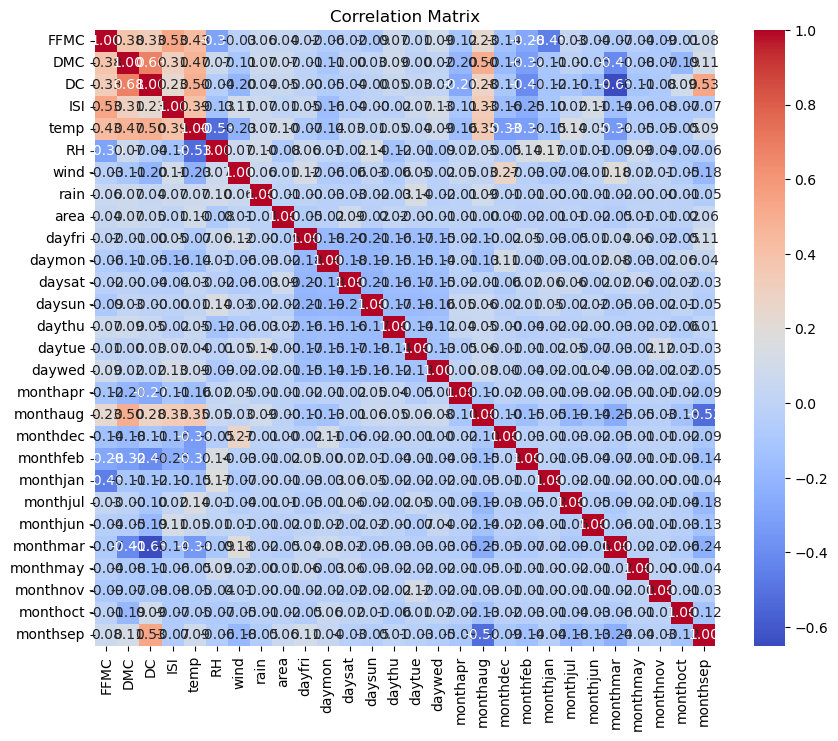

In [14]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### Visualize the distribution of 'Area' and taking insights

In [15]:
# Calculate and print skewness and kurtosis of the 'area' variable
skewness = data['area'].skew()
kurtosis = data['area'].kurtosis()
print("Skew: {}".format(skewness))
print("Kurtosis: {}".format(kurtosis))


Skew: 12.846933533934868
Kurtosis: 194.1407210942299


/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_2737/1125265098.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data['area'], shade=True, color='g')


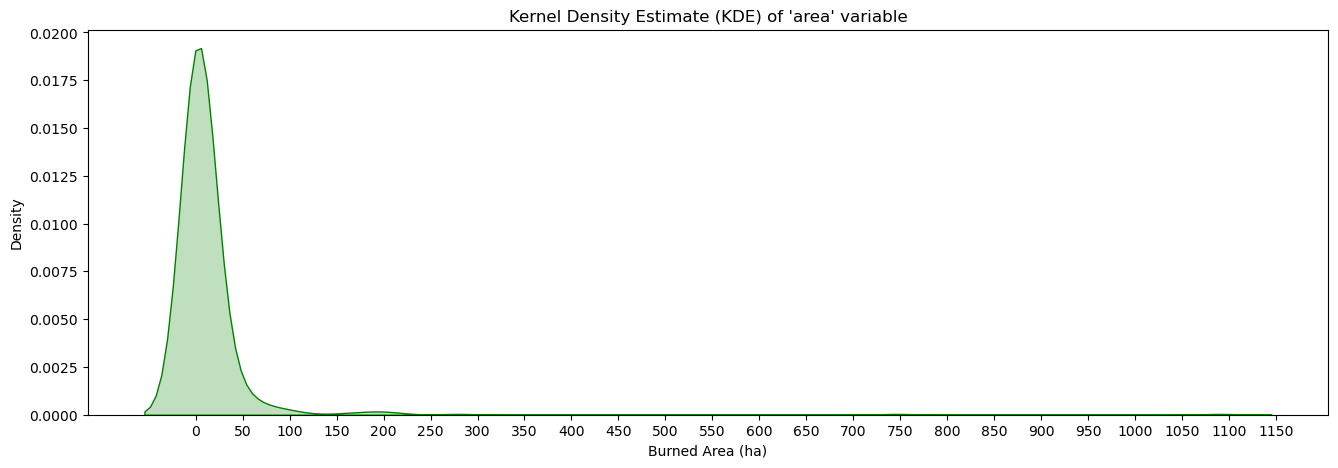

In [16]:
# Plot the KDE of the 'area' variable
plt.figure(figsize=(16, 5))
ax = sns.kdeplot(data['area'], shade=True, color='g')
plt.xticks([i for i in range(0, 1200, 50)])
plt.title("Kernel Density Estimate (KDE) of 'area' variable")
plt.xlabel("Burned Area (ha)")
plt.ylabel("Density")
plt.show()

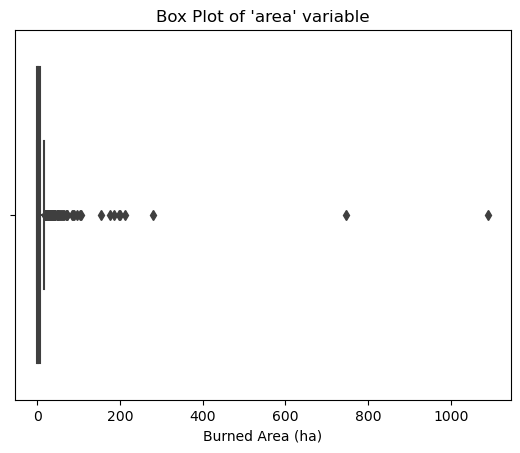

In [17]:
# Plot the box plot of the 'area' variable
ax = sns.boxplot(x=data['area'])
ax.set_title("Box Plot of 'area' variable")
ax.set_xlabel("Burned Area (ha)")
plt.show()

##### The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.
##### The box plot shows that the majority of forest fires do not cover a large area, and most of the damaged area is under 50 hectares of land.

In [18]:
#Analyzing Categorical Columns
categorical_features = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_features)


Categorical Columns: Index(['month', 'day', 'size_category'], dtype='object')


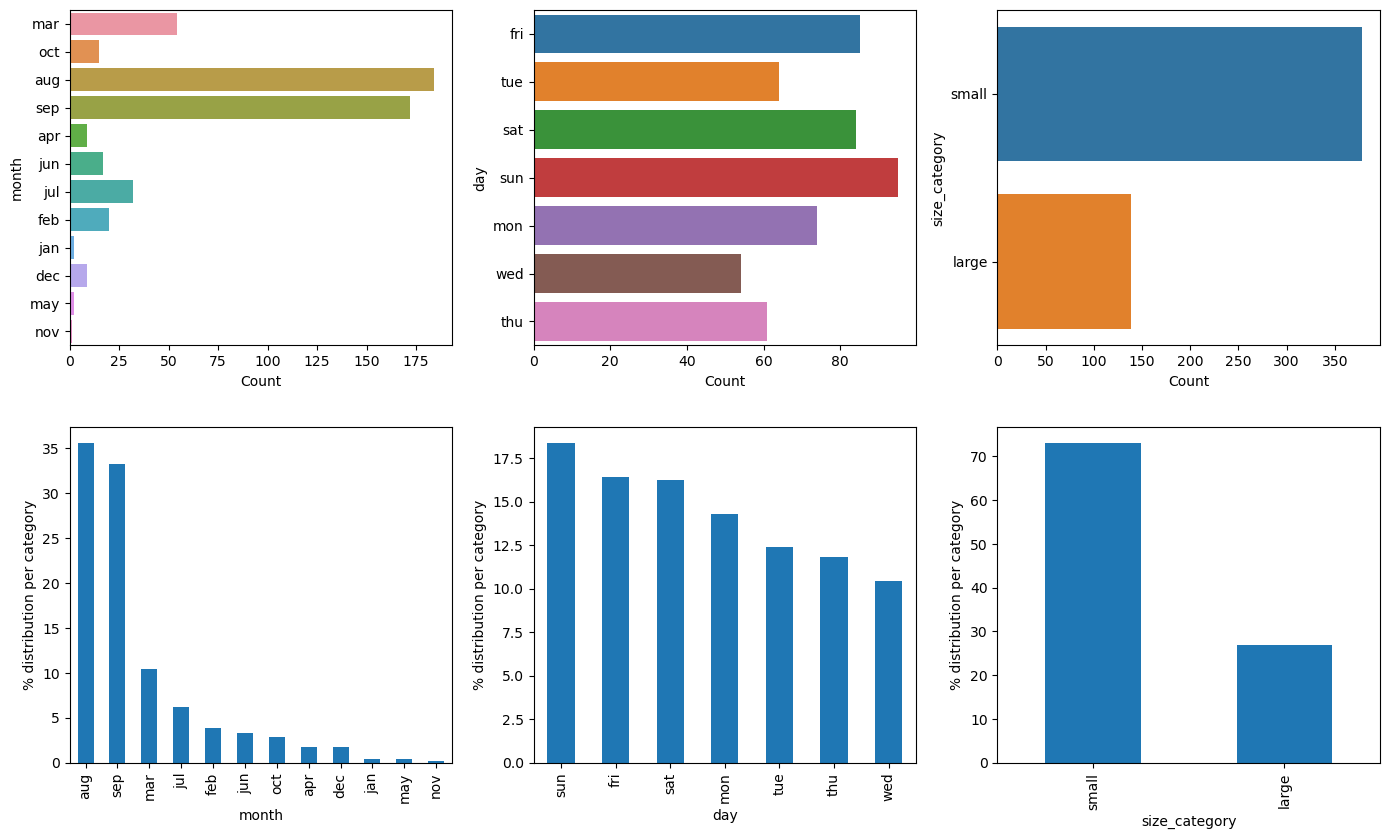

In [19]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_features, 1):
    # Count Plot (Distribution of categories)
    plt.subplot(3, 3, i)
    sns.countplot(data=data, y=col)
    plt.xlabel('Count')
    plt.ylabel(col)

    # Percentage Distribution Plot
    plt.subplot(3, 3, i + 3)
    (data[col].value_counts(normalize=True) * 100).plot.bar()
    plt.ylabel('% distribution per category')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

##### An abnormally high number of forest fires occur in the months of August and September is significant. 
##### Days from Friday to Monday have a relatively higher proportion of forest fire cases 

### Bivariate Analysis

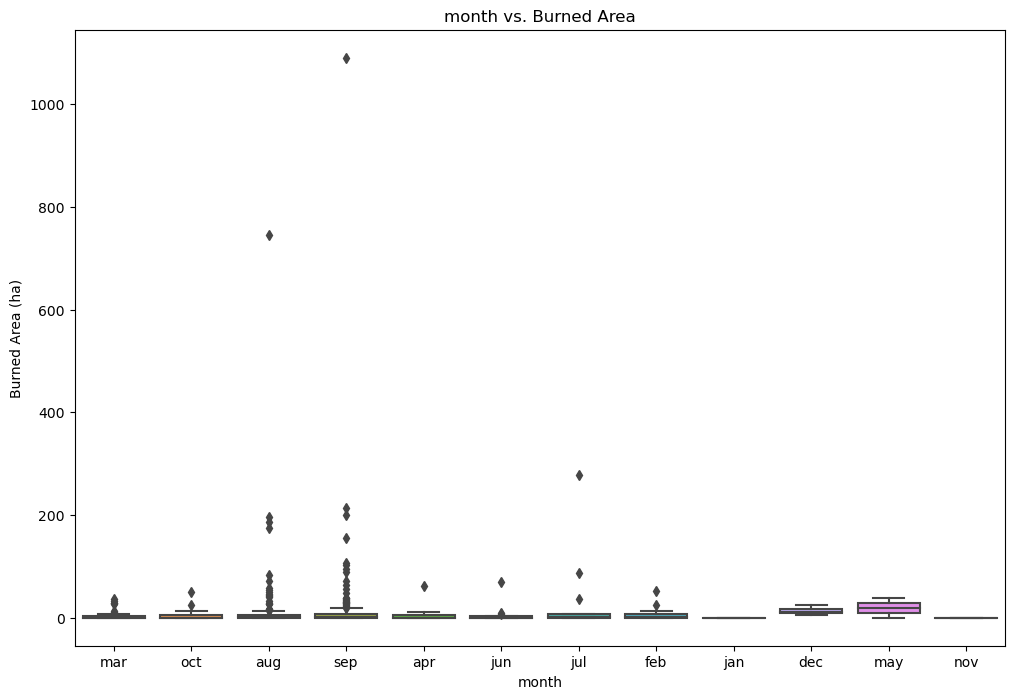

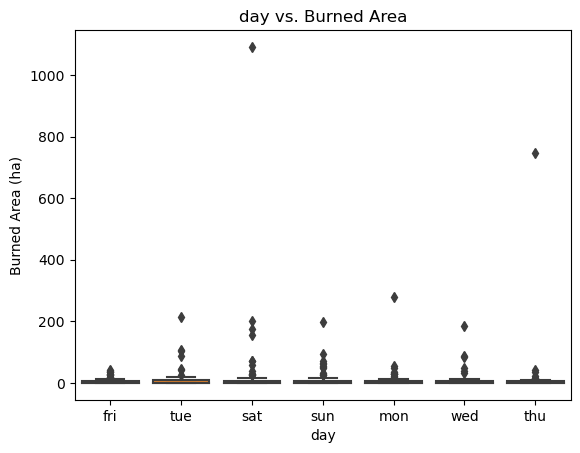

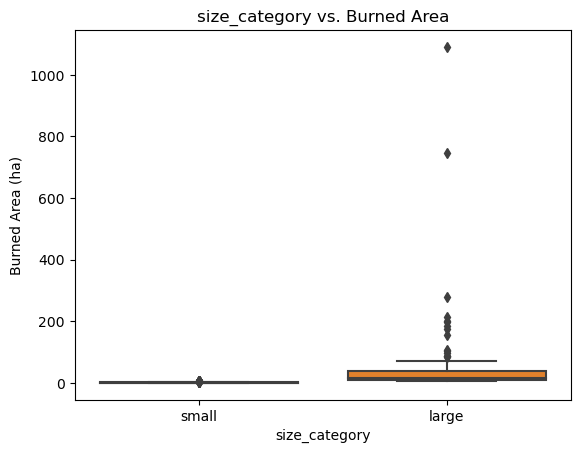

In [20]:
# Using a box plot or violin plot to visualize the relationship between each categorical variable and the target (burned area).
plt.figure(figsize=(12, 8))
for cat_col in categorical_features:
    sns.boxplot(x=cat_col, y='area', data=data)
    plt.title(f'{cat_col} vs. Burned Area')
    plt.ylabel("Burned Area (ha)")
    plt.show()

In [21]:
#specific thresholds to categorize the burned area into different levels of damage
#Define the thresholds for categorization (in hectares)
thresholds = [0, 1, 25, 100, 300, float('inf')] 

In [22]:
# Define the category labels
labels = ['No damage', 'Low', 'Moderate', 'High', 'Very high']

# Create the categorical variable 'burned_area_category' based on the 'area' column
data['burned_area_category'] = pd.cut(data['area'], bins=thresholds, labels=labels, right=False)

# Display the first few rows of the updated DataFrame to inspect the new column
print(data.head())

  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthjan  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
0         0         0         1         0         0         0         0   
1         0         0         0         0         0         1         0   
2         0         0         0         0         0         1         0   
3         0         0         1         0         0         0         0   
4         0         0         1         0         0         0         0   

   size_category  burned_area_category  
0          small             No damage  
1   

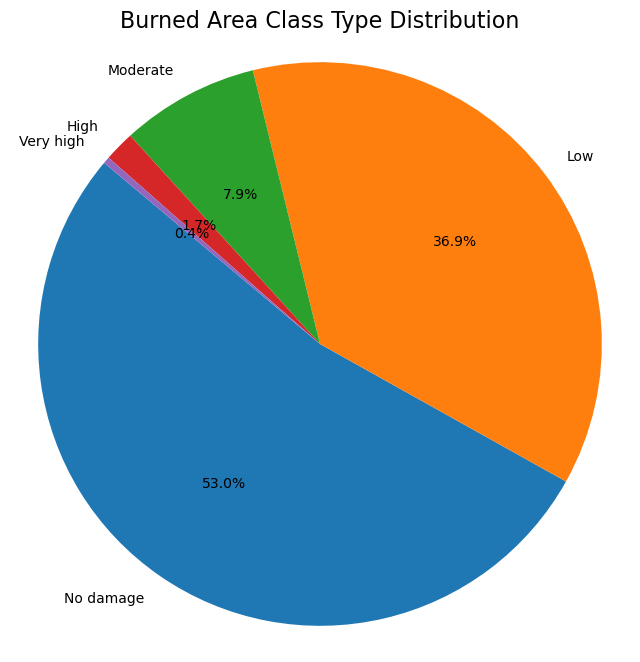

In [23]:
# Calculate the class type distribution
class_distribution = data['burned_area_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Burned Area Class Type Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart appears as a circle.

plt.show()

# Feature Engineering

In [24]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,burned_area_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,No damage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,large,Low
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,large,Moderate
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,large,Low
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,small,No damage


In [25]:
# Encode categorical variables 'month', 'day', 'size', and 'burned_area_category'
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['day'] = label_encoder.fit_transform(data['day'])
data['size_category'] = label_encoder.fit_transform(data['size_category'])
data['burned_area_category'] = label_encoder.fit_transform(data['burned_area_category'])


In [26]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,burned_area_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,1,3
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,1,3
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,1,3
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,1,3
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,2
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,1,3


In [27]:
# Split the data into input features (X) and target variable (y)
X = data.drop('size_category',axis=1)
y = data[['size_category']]

In [28]:
# Normalize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning

In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

In [31]:
# Define the MLPRegressor model for neural network regression
mlp_model = MLPRegressor()

# Define hyperparameter grid for RandomSearch
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

In [32]:
# Perform RandomSearch for hyperparameter tuning
random_search = RandomizedSearchCV(mlp_model, param_distributions=param_grid, n_iter=10, cv=3)
random_search.fit(X_train, y_train)

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptr

RandomizedSearchCV(cv=3, estimator=MLPRegressor(),
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 50)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive']})

In [33]:
# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Best Model Test R^2 Score:", test_score)
print("Best Hyperparameters:", best_params)

Best Model Test R^2 Score: 0.36995037477009185
Best Hyperparameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'alpha': 0.001, 'activation': 'tanh'}


### Evaluating the model

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [35]:
# Predict using the best model
y_pred = best_model.predict(X_test)

In [36]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.2523021717132467
Root Mean Squared Error (RMSE): 0.3520787805105073


##### The MAE represents the average absolute difference between the predicted burned area and the true burned area for the test set.
##### In this case, the MAE value of 0.2236 indicates that, on average, the model's predictions are off by approximately 0.2236 hectares.

##### The RMSE is another measure of the model's prediction accuracy, taking into account the squared differences between the predicted and true burned area values. The RMSE value of 0.3220 indicates the standard deviation of the errors made by the model.



# Cross-validation 
## To better estimate the model's generalization performance and prevent overfitting

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
cv_mae_scores = -cv_scores

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptr

In [39]:
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Cross-Validation MAE Scores:", cv_mae_scores)

# Calculate the mean and standard deviation of RMSE and MAE
print("Mean CV RMSE:", np.mean(cv_rmse_scores))
print("Mean CV MAE:", np.mean(cv_mae_scores))
print("Standard Deviation CV RMSE:", np.std(cv_rmse_scores))
print("Standard Deviation CV MAE:", np.std(cv_mae_scores))

Cross-Validation RMSE Scores: [0.21789507 0.40617915 0.65272459 0.38760068 0.44664908]
Cross-Validation MAE Scores: [0.04747826 0.1649815  0.42604939 0.15023428 0.1994954 ]
Mean CV RMSE: 0.42220971143892144
Mean CV MAE: 0.19764776641815884
Standard Deviation CV RMSE: 0.1392362236805549
Standard Deviation CV MAE: 0.12492935502975357


##### The binary classification neural network seems to be performing reasonably well with low mean CV RMSE and MAE values and relatively low variability in performance.

In [40]:
# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_


In [41]:
# Obtain cross-validated predictions
from sklearn.model_selection import cross_val_predict

cv_predictions = cross_val_predict(best_model, X_scaled, y, cv=5)

# Convert predicted probabilities to binary predictions based on threshold
cv_binary_predictions = np.where(cv_predictions <= 0.5, 0, 1)

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptr

In [44]:
# Obtain cross-validated predictions
cv_predictions = cross_val_predict(best_model, X_scaled, y, cv=5)

# Convert predicted probabilities to binary predictions based on threshold
cv_binary_predictions = np.where(cv_predictions <= 0.5, 0, 1)

# Print the classification report
from sklearn.metrics import classification_report

print("Classification Report after Cross-Validation:")
print(classification_report(y, cv_binary_predictions))

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptr

Classification Report after Cross-Validation:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       139
           1       0.87      0.86      0.87       378

    accuracy                           0.80       517
   macro avg       0.75      0.76      0.75       517
weighted avg       0.81      0.80      0.81       517



/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##### The model achieved an accuracy of approximately 0.80, indicating that about 80% of the predictions are correct.
##### The model performs better in predicting the "1" class (large fires) with a precision of 0.87, recall of 0.86, and F1-score of 0.87. It is better at identifying large fires.
##### The model performs relatively well in predicting the "0" class (small fires) with a precision of 0.63, recall of 0.65, and F1-score of 0.64.
##### The macro avg and weighted avg give a balanced performance estimate, considering the class distribution.
